In [1]:
#Problem statement: using K-Nearest Neighbors (KNN) classification, we aim to predict whether or not an employee will be promoted based on their individual details. 
                    #In this HR dataset, the company promotes 5% of its employees each year, and our task is to identify eligible candidates for promotion. KNN will help us achieve this by analyzing the characteristics of employees and classifying them as potential candidates for promotion or not.

In [2]:
import pandas as pd
import numpy as np


class DataPreparation:
    """
    Class for preparing the data.
    """
    def __init__(self, train_path, test_path):
        """
        Initialize DataPreparation with train and test file paths.

        Args:
            train_path (str): Path to the training data CSV file.
            test_path (str): Path to the testing data CSV file.
        """
        self.train_path = train_path
        self.test_path = test_path
        self.train_df = None
        self.test_df = None

    def load_data(self):
        """
        Load data from CSV files into train_df and test_df.
        """
        self.train_df = pd.read_csv(self.train_path)
        self.test_df = pd.read_csv(self.test_path)
        print("Data loaded successfully.")

    def remove_duplicates(self):
        """
        Remove duplicate rows from train_df and test_df.
        """
        self.train_df.drop_duplicates(inplace=True)
        self.test_df.drop_duplicates(inplace=True)
        print("Duplicates removed.")

    def handle_missing_values(self):
        """
        Handle missing values in the data.
        """
         # Handle missing values in train_df
        for column in self.train_df.columns:
            if self.train_df[column].dtype == 'object':
                mode_val = self.train_df[column].mode()[0]
                self.train_df[column].fillna(mode_val, inplace=True)
            else:  # Numeric columns
                median_val = self.train_df[column].median()
                self.train_df[column].fillna(median_val, inplace=True)

        # Handle missing values in test_df
        for column in self.test_df.columns:
            if self.test_df[column].dtype == 'object':
                mode_val = self.train_df[column].mode()[0]  # Use mode from train_df
                self.test_df[column].fillna(mode_val, inplace=True)
            else:  # Numeric columns
                median_val = self.train_df[column].median()  # Use median from train_df
                self.test_df[column].fillna(median_val, inplace=True)
       
        print("Missing values handled.")


In [3]:
try:
    # Initialize and load data
    data_prep = DataPreparation(train_path="C:\\Users\\vishn\\Downloads\\train.csv.zip",
                                test_path="C:\\Users\\vishn\\Downloads\\test.csv.zip")
    data_prep.load_data()
    data_prep.remove_duplicates()
    data_prep.handle_missing_values()
    
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded successfully.
Duplicates removed.
Missing values handled.


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

class DataVisualization:
    """
    Class for visualizing the data.
    """
    def __init__(self, train_df, test_df):
        """
        Initialize DataVisualization with train and test dataframes.

        Args:
            train_df (pd.DataFrame): Training data.
            test_df (pd.DataFrame): Testing data.
        """
        self.train_df = train_df
        self.test_df = test_df
        # Summary, head, and structure of train_df
        print(self.train_df.describe(include='all'))
        print()
        print(self.train_df.head())
        print()
        print(self.train_df.info())
        print()

        # Summary, head, and structure of test_df
        print(self.test_df.describe(include='all'))
        print()
        print(self.test_df.head())
        print()
        print(self.test_df.info())
        print()

        # Sum of NA values in train_df
        print(self.train_df.isna().sum())

        # Various plots (using Seaborn and Matplotlib)
        sns.countplot(data=self.train_df, x='is_promoted')
        plt.show()
        
        numerical_cols = self.train_df.select_dtypes(include=[np.number]).columns

    
        plt.figure(figsize=(12, 6))
        sns.countplot(data=self.train_df, x='department', hue='is_promoted')
        plt.xticks(rotation=45)
        plt.title('Promotion Status by Department')
        plt.show()

        # Bar plot for 'region' and 'is_promoted'
        plt.figure(figsize=(12, 6))
        sns.countplot(data=self.train_df, x='region', hue='is_promoted')
        plt.xticks(rotation=45)
        plt.title('Promotion Status by Region')
        plt.show()

        # Bar plot for 'education' and 'is_promoted'
        plt.figure(figsize=(12, 6))
        sns.countplot(data=self.train_df, x='education', hue='is_promoted')
        plt.xticks(rotation=45)
        plt.title('Promotion Status by Education')
        plt.show()

        # Bar plot for 'gender' and 'is_promoted'
        plt.figure(figsize=(12, 6))
        sns.countplot(data=self.train_df, x='gender', hue='is_promoted')
        plt.title('Promotion Status by Gender')
        plt.show()

        # Boxplot for 'recruitment_channel' and 'is_promoted'
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=self.train_df, x='recruitment_channel', y='is_promoted')
        plt.title('Promotion Status by Recruitment Channel')
        plt.show()

        # Boxplot for 'no_of_trainings' and 'avg_training_score'
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=self.train_df, x='no_of_trainings', y='avg_training_score')
        plt.title('Average Training Score by Number of Trainings')
        plt.show()

        # Boxplot for 'age' and 'is_promoted'
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=self.train_df, x='is_promoted', y='age')
        plt.title('Age Distribution by Promotion Status')
        plt.show()

        # Violin plot for 'age' and 'is_promoted'
        plt.figure(figsize=(12, 6))
        sns.violinplot(data=self.train_df, x='is_promoted', y='age')
        plt.title('Age Distribution by Promotion Status - Violin Plot')
        plt.show()

        # Violin plot for 'previous_year_rating' and 'is_promoted'
        plt.figure(figsize=(12, 6))
        sns.violinplot(data=self.train_df, x='is_promoted', y='previous_year_rating')
        plt.title('Previous Year Rating by Promotion Status')
        plt.show()

        # Violin plot for 'length_of_service' and 'is_promoted'
        plt.figure(figsize=(12, 6))
        sns.violinplot(data=self.train_df, x='is_promoted', y='length_of_service')
        plt.title('Length of Service by Promotion Status')
        plt.show()

        # Bar plot for 'KPIs_met..80.' and 'is_promoted'
        plt.figure(figsize=(12, 6))
        sns.countplot(data=self.train_df, x='KPIs_met >80%', hue='is_promoted')
        plt.title('Promotion Status by KPIs Met')
        plt.show()

        # Bar plot for 'awards_won.' and 'is_promoted'
        plt.figure(figsize=(12, 6))
        sns.countplot(data=self.train_df, x='awards_won?', hue='is_promoted')
        plt.title('Promotion Status by Awards Won')
        plt.show()

        # Boxplot for 'avg_training_score' and 'is_promoted'
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=self.train_df, x='is_promoted', y='avg_training_score')
        plt.title('Average Training Score by Promotion Status')
        plt.show()

        # Boxplot for numerical variables
        plt.figure(figsize=(12, 8))
        sns.boxplot(data=self.train_df[numerical_cols])
        plt.title('Boxplot of Numerical Variables')
        plt.show()
        

         employee_id         department    region   education gender  \
count   54808.000000              54808     54808       54808  54808   
unique           NaN                  9        34           3      2   
top              NaN  Sales & Marketing  region_2  Bachelor's      m   
freq             NaN              16840     12343       39078  38496   
mean    39195.830627                NaN       NaN         NaN    NaN   
std     22586.581449                NaN       NaN         NaN    NaN   
min         1.000000                NaN       NaN         NaN    NaN   
25%     19669.750000                NaN       NaN         NaN    NaN   
50%     39225.500000                NaN       NaN         NaN    NaN   
75%     58730.500000                NaN       NaN         NaN    NaN   
max     78298.000000                NaN       NaN         NaN    NaN   

       recruitment_channel  no_of_trainings           age  \
count                54808     54808.000000  54808.000000   
unique       

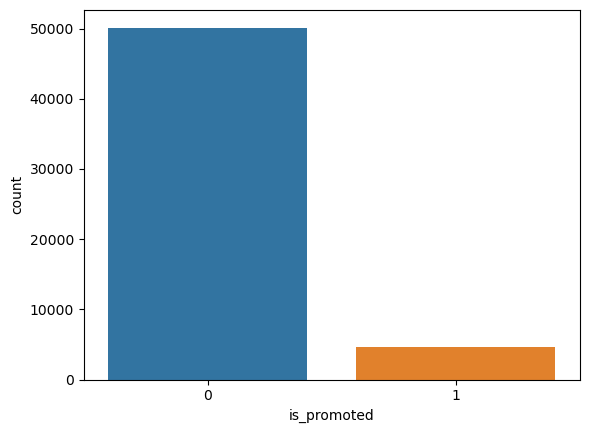

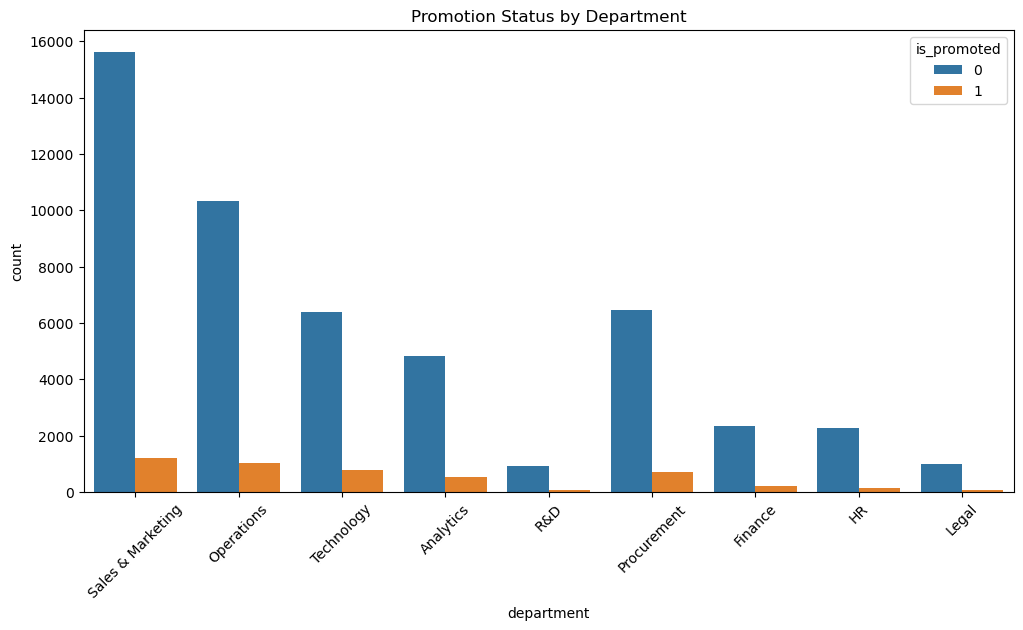

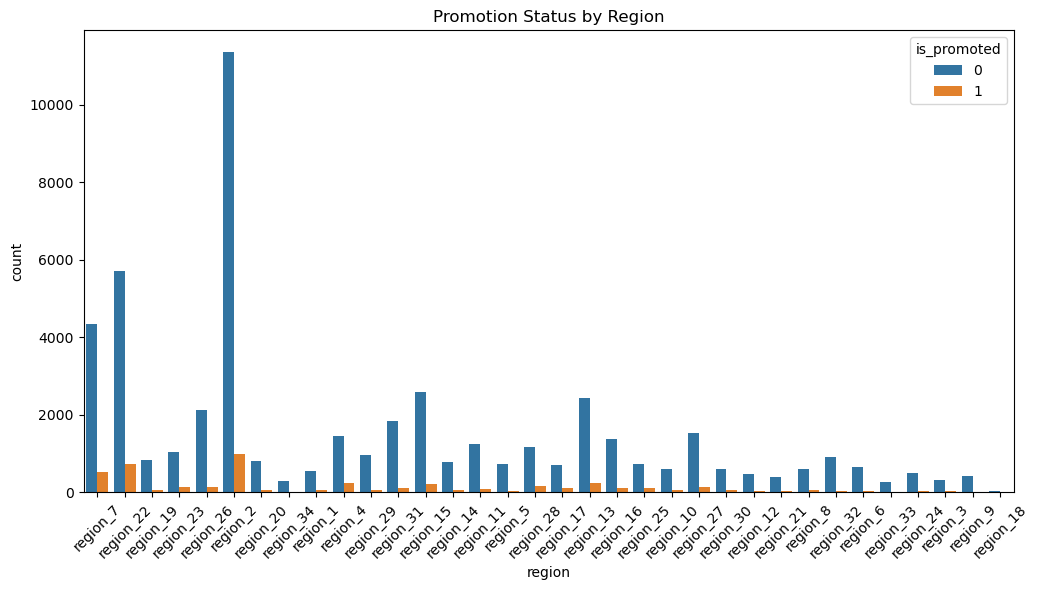

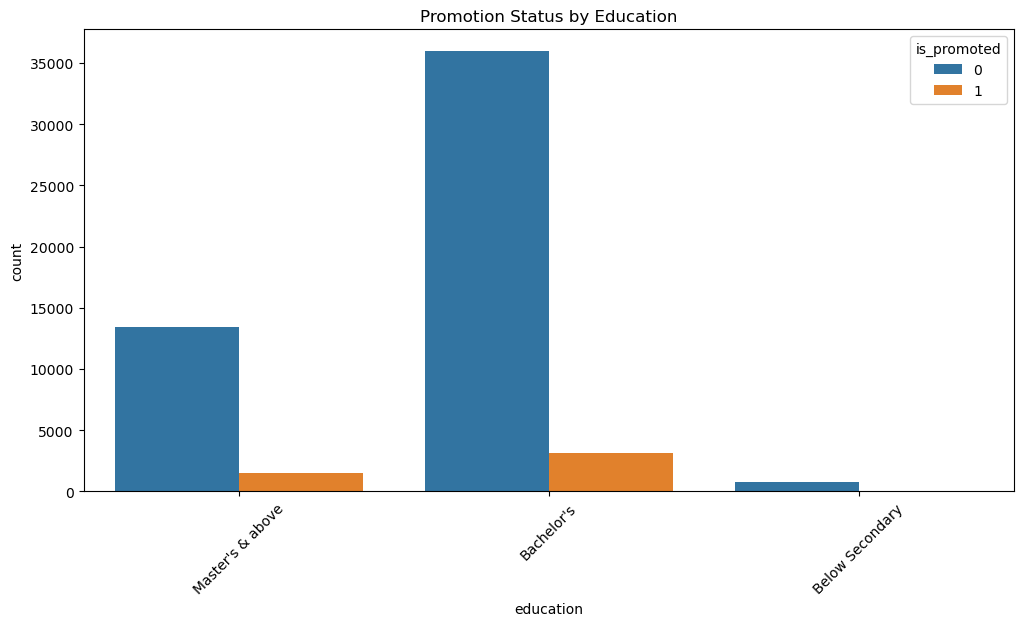

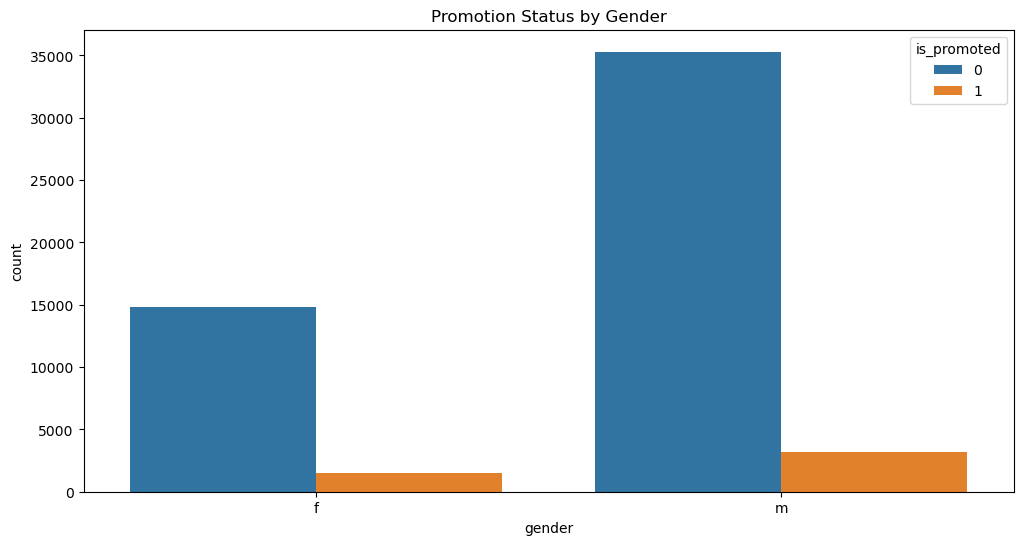

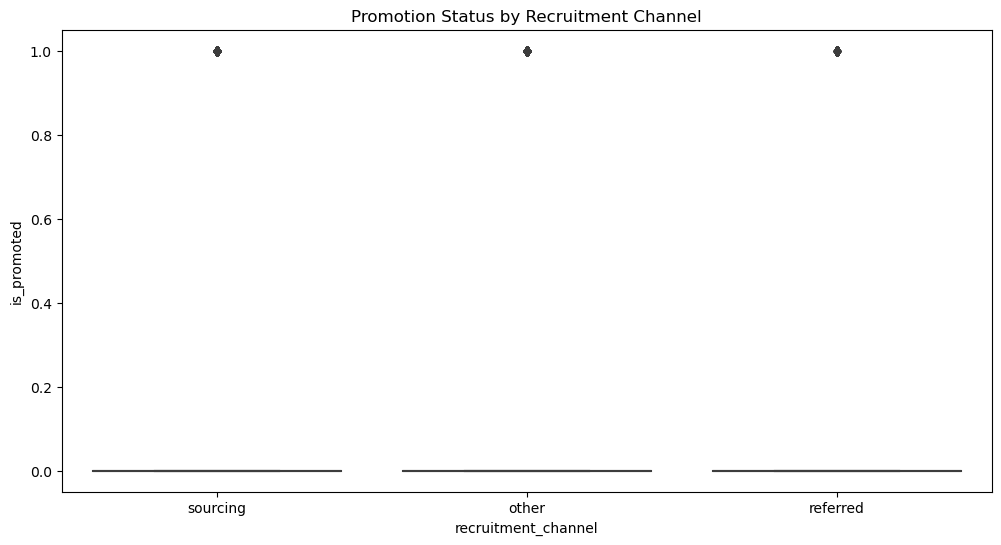

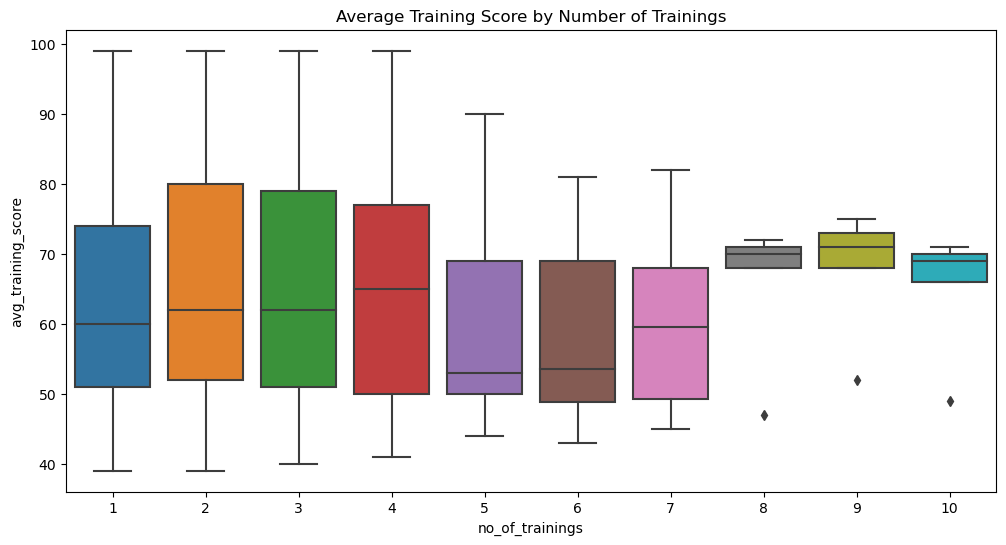

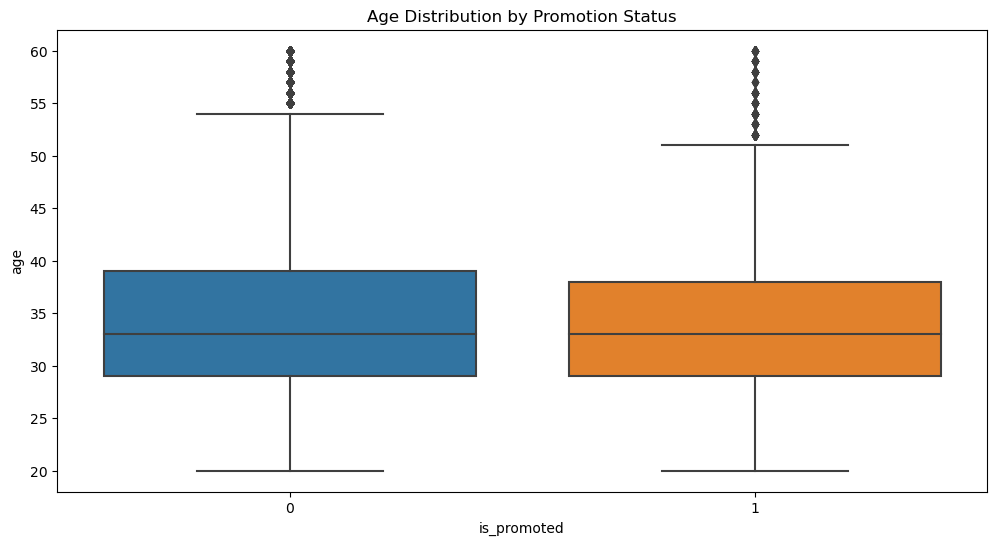

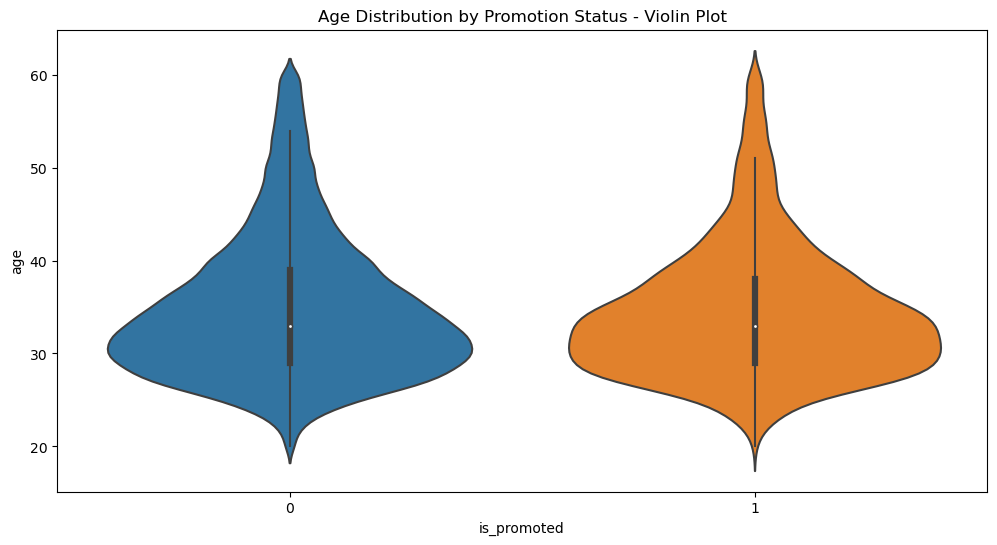

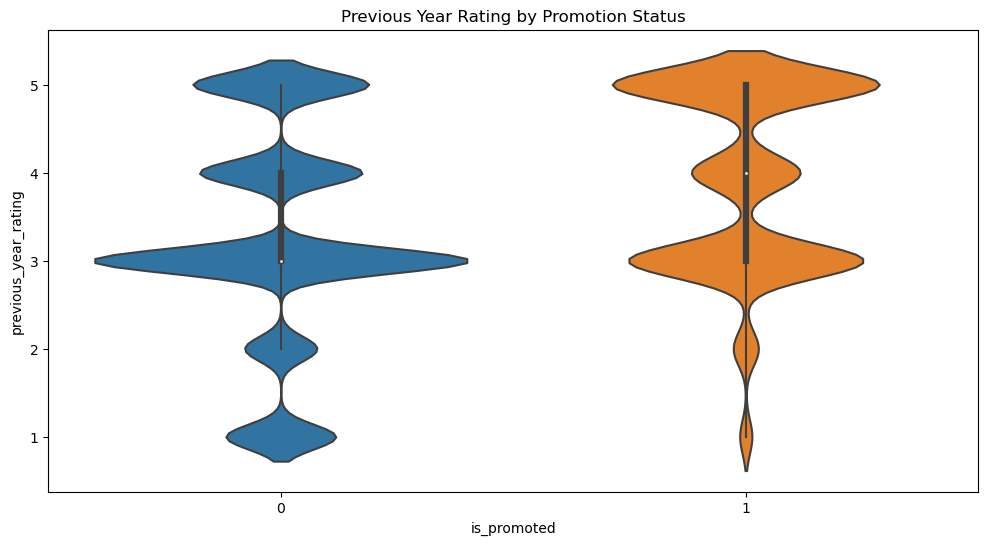

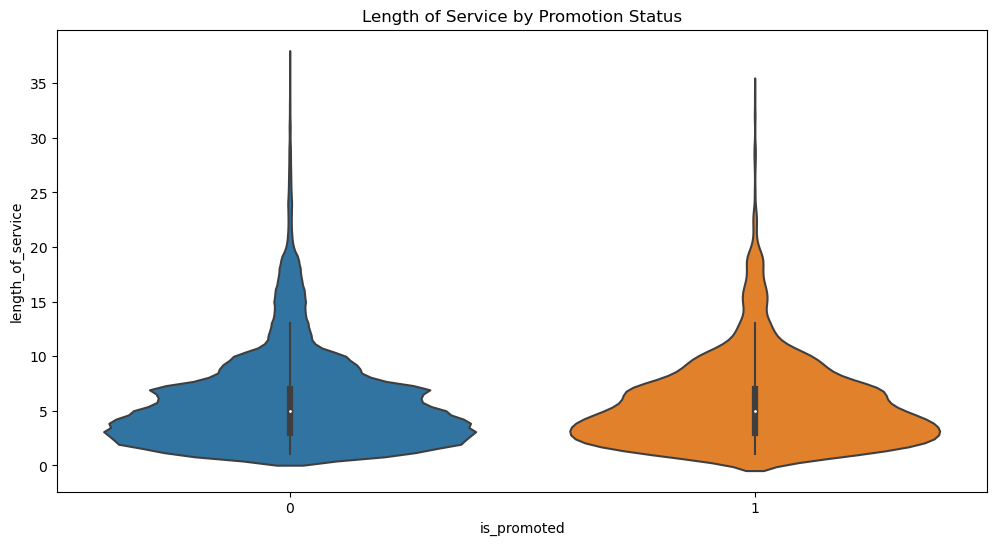

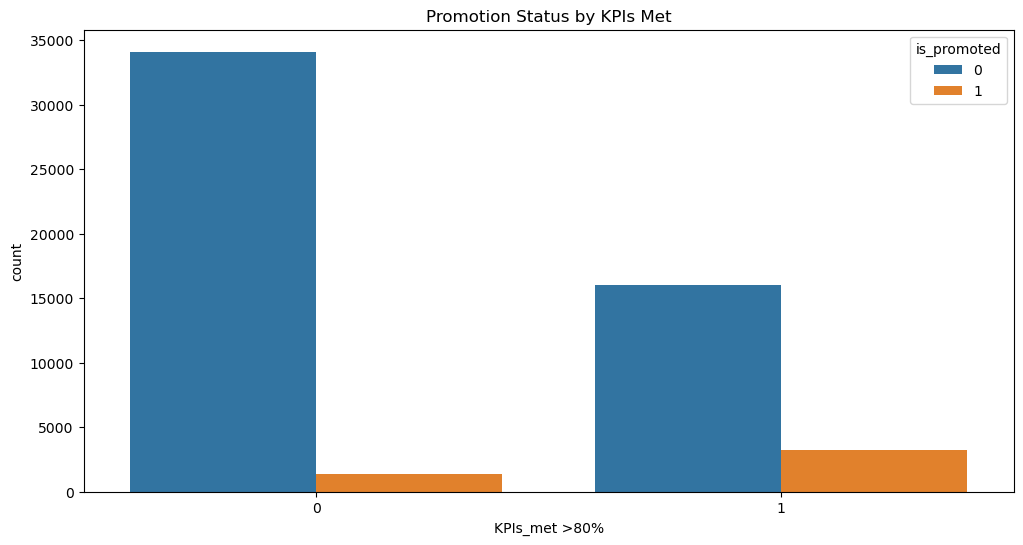

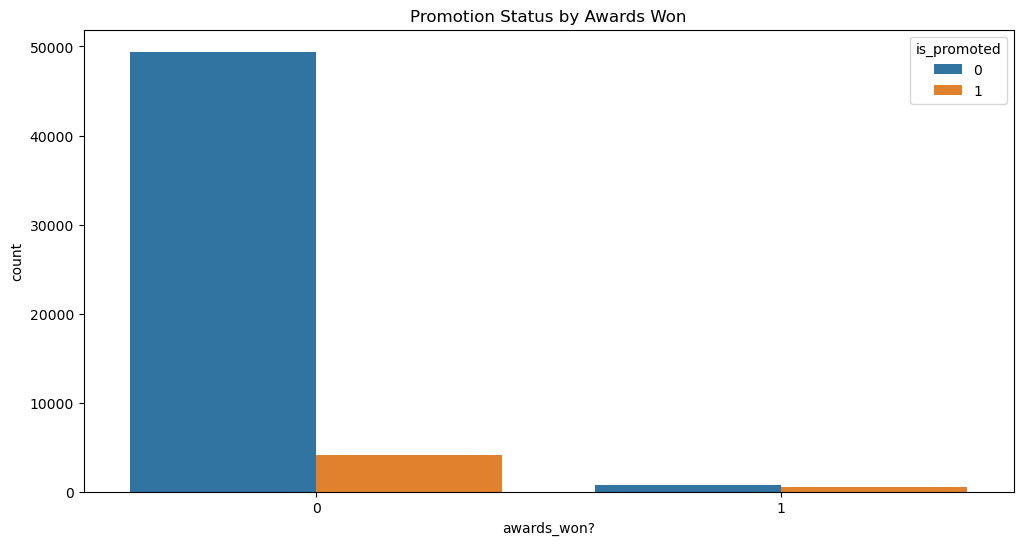

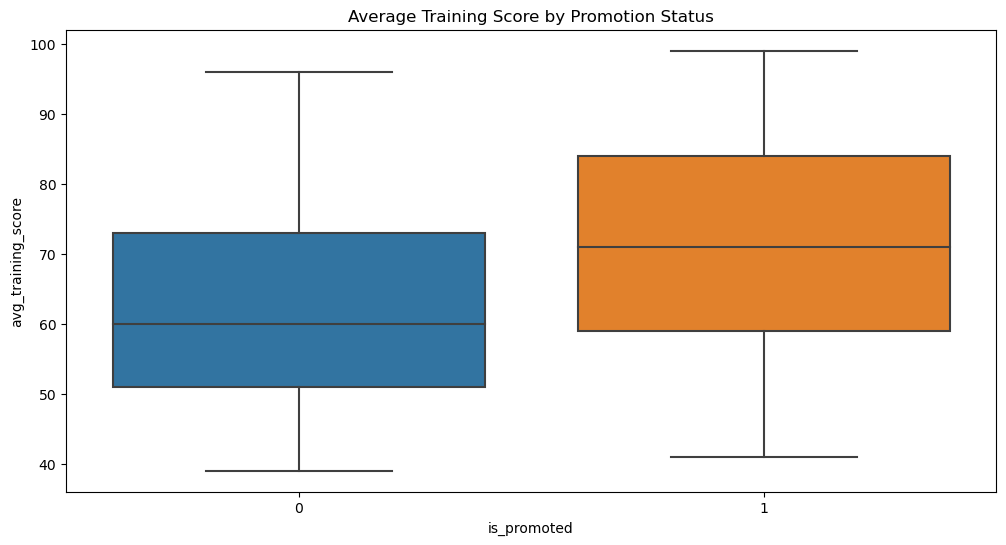

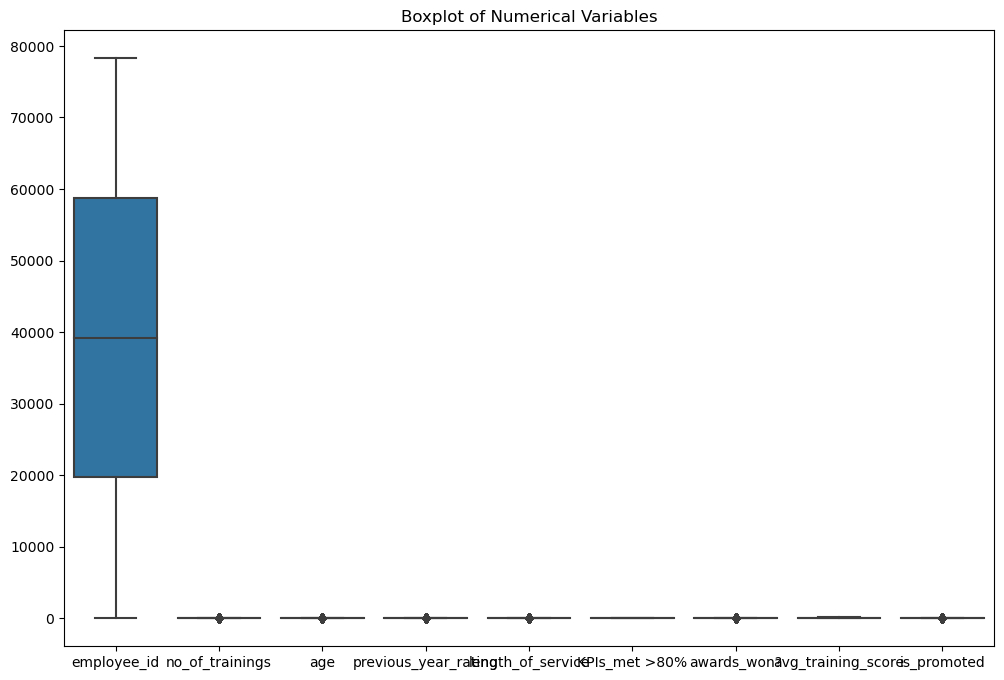

In [5]:
try:
    # Visualize data
    data_viz = DataVisualization(data_prep.train_df,data_prep.test_df)
 
except Exception as e:
    print(f"An error occurred: {e}")

In [6]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

class DataTransformation:
    """
    Class for transforming the data.
    """
    def __init__(self, train_df, test_df):
        """
        Initialize DataTransformation with train and test dataframes.

        Args:
            train_df (pd.DataFrame): Training data.
            test_df (pd.DataFrame): Testing data.
        """
        self.train_df = train_df
        self.test_df = test_df

    def convert_to_numeric(self):
        """
        Convert categorical data to numeric using LabelEncoder.
        """
        label_encoder = LabelEncoder()
        categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']
        for col in categorical_columns:
            self.train_df[col] = label_encoder.fit_transform(self.train_df[col])
            self.test_df[col] = label_encoder.transform(self.test_df[col])
        print("Categorical data converted to numeric.")
        print()
        

    
        
    def normalize_data(self):
        """
        Normalize numerical data columns.
        """
            # Normalize each numeric column except 'employee_id' and 'is_promoted'
        def normalize_column(col):
            if pd.api.types.is_numeric_dtype(col) and not pd.api.types.is_bool_dtype(col):
                return (col - col.min()) / (col.max() - col.min())
            return col

        cols_to_normalize = [col for col in self.train_df.columns if col not in ['employee_id', 'is_promoted']]
        self.train_df[cols_to_normalize] = self.train_df[cols_to_normalize].apply(normalize_column)
        self.test_df[cols_to_normalize] = self.test_df[cols_to_normalize].apply(normalize_column)

        print(self.train_df.head())
        print()
        print(self.test_df.head())
        print()
        print("Data normalized.")
            
        self.correlation_analysis()
            
    def correlation_analysis(self):
        """
        Perform correlation analysis and visualize the correlation heatmap.
        """
        # Select only numerical columns
        numerical_cols = self.train_df.select_dtypes(include=[np.number]).columns
        # Correlation heatmap
        correlation_matrix = self.train_df[numerical_cols].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap')
        plt.show()

Categorical data converted to numeric.

   employee_id  department    region  education  gender  recruitment_channel  \
0        65438       0.875  0.939394        1.0     0.0                  1.0   
1        65141       0.500  0.424242        0.0     1.0                  0.0   
2         7513       0.875  0.303030        0.0     1.0                  1.0   
3         2542       0.875  0.454545        0.0     1.0                  0.0   
4        48945       1.000  0.545455        0.0     1.0                  0.0   

   no_of_trainings    age  previous_year_rating  length_of_service  \
0         0.000000  0.375                   1.0           0.194444   
1         0.000000  0.250                   1.0           0.083333   
2         0.000000  0.350                   0.5           0.166667   
3         0.111111  0.475                   0.0           0.250000   
4         0.000000  0.625                   0.5           0.027778   

   KPIs_met >80%  awards_won?  avg_training_score  is_prom

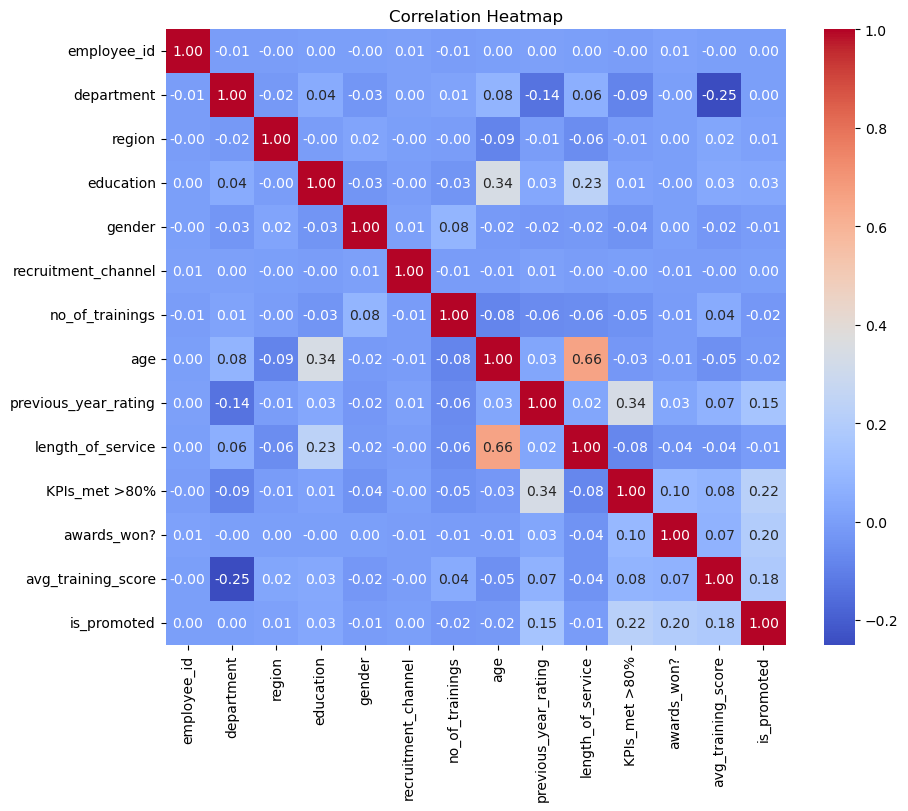

In [7]:
try:   
    # Transform data
    data_transform = DataTransformation(data_prep.train_df, data_prep.test_df)
    data_transform.convert_to_numeric()
    data_transform.normalize_data()

except Exception as e:
    print(f"An error occurred: {e}")

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt

class ModelTraining:
    """
    Class for training and evaluating a KNN model.
    """
    def __init__(self, train_df):
        """
        Initialize ModelTraining with training dataframe.

        Args:
            train_df (pd.DataFrame): Training data.
        """
        self.train_df = train_df
        self.X_train = None
        self.X_val = None
        self.y_train = None
        self.y_val = None
        self.knn = None

    def split_data(self):
        """
        Split the data into training and validation sets.
        """
        # Handle missing values by removing rows with missing values
        self.train_df.dropna(inplace=True)
        
        X = self.train_df[['KPIs_met >80%', 'awards_won?', 'avg_training_score', 'previous_year_rating']]
        y = self.train_df['is_promoted']
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        print("Data split into train and validation sets.")

    def knn_classifier(self):
        """
        Train a KNN classifier.
        """
        self.knn = KNeighborsClassifier(n_neighbors=5)
        self.knn.fit(self.X_train, self.y_train)
        print("KNN model trained.")

    def evaluate_model(self):
        """
        Evaluate the KNN model and print evaluation metrics.
        """
        y_pred = self.knn.predict(self.X_val)
        accuracy = accuracy_score(self.y_val, y_pred)
        precision = precision_score(self.y_val, y_pred)
        recall = recall_score(self.y_val, y_pred)
        f1 = f1_score(self.y_val, y_pred)
        print(f"Accuracy: {accuracy*100}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

    def plot_roc_curve(self):
        probabilities = self.knn.predict_proba(self.X_val)[:, 1]
        fpr, tpr, _ = roc_curve(self.y_val, probabilities)
        plt.figure()
        plt.plot(fpr, tpr, label='ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()


Data split into train and validation sets.
KNN model trained.
Accuracy: 92.6655719759168, Precision: 0.782608695652174, Recall: 0.15859030837004406, F1 Score: 0.26373626373626374


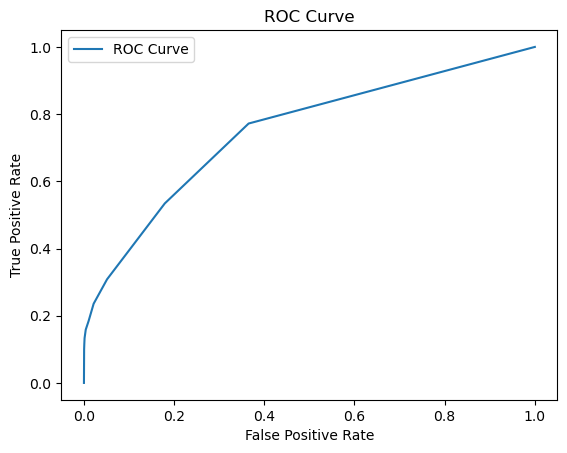

In [19]:



try:
    model_train = ModelTraining(data_transform.train_df)
    model_train.split_data()
    model_train.knn_classifier()
    model_train.evaluate_model()
    model_train.plot_roc_curve()
except Exception as e:
    print(f"An error occurred: {e}")



In [10]:
class ModelApplication:
    def __init__(self, trained_model, test_df):
        """
        Initialize with the trained model and test dataframe.

        Args:
            trained_model (ModelTraining): The trained KNN model.
            test_df (pd.DataFrame): Test data without target labels.
        """
        self.trained_model = trained_model
        self.test_df = test_df
        self.predictions = None

    def preprocess_test_data(self):
        """
        Preprocess the test data (similar to how training data was preprocessed).--
        """
        # Handle missing values by removing rows with missing values
        self.test_df.dropna(inplace=True)

        # Selecting the same features as used in the training model
        self.test_features = self.test_df[['KPIs_met >80%', 'awards_won?', 'avg_training_score', 'previous_year_rating']]

    def make_predictions(self):
        """
        Make predictions on the test data using the trained model.
        """
        self.predictions = self.trained_model.knn.predict(self.test_features)
        print("Predictions made on the test data.")
        print(self.predictions)
        self.test_df['predictions'] = self.predictions
        print(self.test_df.describe())
        print(self.test_df.head(30))

# Usage
try:
    model_app = ModelApplication(model_train, data_transform.test_df)  # Replace 'your_initial_test_data' with your actual test DataFrame
    model_app.preprocess_test_data()
    model_app.make_predictions()
    
    print(model_app)
except Exception as e:
    print(f"An error occurred: {e}")



Predictions made on the test data.
[0 0 0 ... 0 0 0]
        employee_id    department        region     education        gender  \
count  23490.000000  23490.000000  23490.000000  23490.000000  23490.000000   
mean   39041.399149      0.620929      0.468651      0.284845      0.706513   
std    22640.809201      0.314312      0.264400      0.446919      0.455369   
min        3.000000      0.000000      0.000000      0.000000      0.000000   
25%    19370.250000      0.500000      0.333333      0.000000      0.000000   
50%    38963.500000      0.625000      0.424242      0.000000      1.000000   
75%    58690.000000      0.875000      0.636364      1.000000      1.000000   
max    78295.000000      1.000000      1.000000      1.000000      1.000000   

       recruitment_channel  no_of_trainings           age  \
count         23490.000000     23490.000000  23490.000000   
mean              0.433653         0.031779      0.369573   
std               0.490722         0.075114      0.1